# Ordinary Least Squares

In [1]:
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



## OLS Model of 5 year estimate

### Import data

In [2]:
#import estimates of population and attributes.
df = pd.read_csv('03-25-19-estimate-5yrs')

#import estimates of uninsured population and attributes.
df1 = pd.read_csv('03-25-19-estimate-uninsured-5yrs')

#Calculating additional attributes.
df['total estimate insured'] = df['Total; Estimate; Total civilian noninstitutionalized population'] - df1['Total Uninsured; Estimate; Total civilian noninstitutionalized population']
df['percentage insured'] = df['total estimate insured'] /  df['Total; Estimate; Total civilian noninstitutionalized population']

### Shape of the data

In [4]:
print("Shape of 5 year estimate data:",df.shape)
print("Shape of 5 year uninsured estimate data:",df1.shape)

Shape of 5 year estimate data: (751, 59)
Shape of 5 year uninsured estimate data: (751, 59)


#### Fit and Summary

In [5]:
y = df['percentage insured']
X = df.iloc[:,6:57]

X = sm.add_constant(X)

res = sm.OLS(y.astype(float),X.astype(float)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     percentage insured   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     62.91
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          1.28e-220
Time:                        09:59:10   Log-Likelihood:                 1837.9
No. Observations:                 751   AIC:                            -3578.
Df Residuals:                     702   BIC:                            -3351.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================================================
                                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                 -0.0003      0.000     -1.118      0.264      -0.001       0.000
Total; Estimate; AGE - 65 years and older                                                                                             -0.0010      0.016     -0.062      0.951      -0.033       0.031
Total; Estimate; AGE - 65 years and older - 65 to 74 years                                                                            -0.0042      0.016     -0.263      0.793      -0.036       0.027
Total; Estimate; AGE - 65 years and older - 75 years and older                                                                         0.0003      0.016      0.018      0.986      -0.031       0.032
Total; Estimate; Median age (years)                                                                                                    0.0031      0.001      3.944      0.000       0.002       0.005
Total; Estimate; SEX - Male                                                                                                           -0.0147      0.012     -1.214      0.225      -0.038       0.009
Total; Estimate; SEX - Female                                                                                                         -0.0123      0.012     -1.018      0.309      -0.036       0.011
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race                                                                        -0.0120      0.014     -0.887      0.375      -0.039       0.015
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White alone                                                          -0.0059      0.011     -0.550      0.583      -0.027       0.015
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American alone                                      -0.0024      0.011     -0.223      0.824      -0.023       0.019
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native alone                              -0.0036      0.011     -0.338      0.735      -0.025       0.017
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander alone                      0.0028      0.011      0.256      0.798      -0.019       0.024
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Two or more races                           

## OLS Model of 1 year estimate

In [6]:
#import estimates of population and attributes.
df_one = pd.read_csv('03-25-19-estimate-1yr')

#import estimates of uninsured population and attributes.
df_un_one = pd.read_csv('03-25-19-estimate-uninsured-1yr')

#Calculating additional attributes.
df_one['total estimate insured'] = df_one['Total; Estimate; Total civilian noninstitutionalized population'] - df_un_one['Total Uninsured; Estimate; Total civilian noninstitutionalized population']
df_one['percentage insured'] = df_one['total estimate insured'] /  df_one['Total; Estimate; Total civilian noninstitutionalized population']

In [7]:
print("Shape of 1 year estimate data:",df_one.shape)
print("Shape of 1 year uninsured estimate data:",df_un_one.shape)

Shape of 1 year estimate data: (69, 59)
Shape of 1 year uninsured estimate data: (69, 59)


In [8]:
y = df_one['percentage insured']
X = df_one.iloc[:,6:57]
X = sm.add_constant(X)
est = sm.OLS(y.astype(float),X.astype(float)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     percentage insured   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     7.532
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           4.74e-06
Time:                        09:59:15   Log-Likelihood:                 218.58
No. Observations:                  69   AIC:                            -339.2
Df Residuals:                      20   BIC:                            -229.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================================================
                                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                 -0.0004      0.001     -0.304      0.765      -0.003       0.002
Total; Estimate; AGE - 65 years and older                                                                                             -0.1105      0.105     -1.054      0.305      -0.329       0.108
Total; Estimate; AGE - 65 years and older - 65 to 74 years                                                                             0.1085      0.102      1.063      0.300      -0.104       0.321
Total; Estimate; AGE - 65 years and older - 75 years and older                                                                         0.1128      0.103      1.094      0.287      -0.102       0.328
Total; Estimate; Median age (years)                                                                                                   -0.0007      0.007     -0.105      0.918      -0.015       0.014
Total; Estimate; SEX - Male                                                                                                           -0.0074      0.057     -0.131      0.897      -0.126       0.111
Total; Estimate; SEX - Female                                                                                                         -0.0283      0.061     -0.463      0.648      -0.156       0.099
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race                                                                        -0.0267      0.071     -0.377      0.710      -0.175       0.121
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White alone                                                           0.0098      0.051      0.193      0.849      -0.096       0.116
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American alone                                       0.0128      0.051      0.250      0.805      -0.094       0.119
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native alone                               0.0036      0.049      0.073      0.943      -0.099       0.106
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander alone                      0.0032      0.047      0.068      0.947      -0.095       0.101
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Two or more races                           

### Difference of Coef (5 year - 1 year) 

In [9]:
pd.DataFrame(res.params - est.params, columns = ['Difference'])

,Difference
const,8.761586e-05
Total; Estimate; AGE - 65 years and older,1.095241e-01
Total; Estimate; AGE - 65 years and older - 65 to 74 years,-1.127477e-01
Total; Estimate; AGE - 65 years and older - 75 years and older,-1.125458e-01
Total; Estimate; Median age (years),3.819036e-03
Total; Estimate; SEX - Male,-7.224039e-03
Total; Estimate; SEX - Female,1.598563e-02
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race,1.469220e-02
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White alone,-1.562333e-02
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American alone,-1.515429e-02


## Testing Assumptions

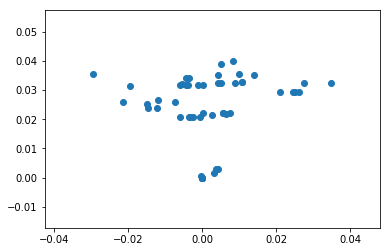

In [10]:
# print('Parameters: ', est.bse)
# print('Standard errors: ', est.bse)
# print('Predicted values: ', est.predict())
err_series = res.params - res.conf_int()[0]
plt.scatter(res.params,err_series)
plt.show()

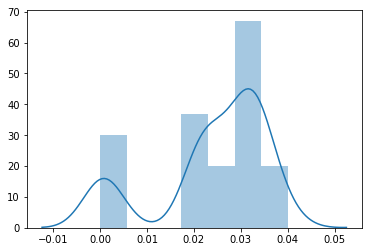

In [44]:
import seaborn as sns
sns.distplot(err_series);